In [2]:
##author:Shreya Bagchi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('rawdata.csv')
data.head()

,Division Key,RDD Year Key,RDD Month Key,SID,Departure Zone,Shipping conditions Key,Shipment Original Destination Appt Date,Shipment Revised Destination Appt Date,Shipment Arrive at Destination Date,Goods Issue Date - System A,...,SCAC ID,Plant Key,Sold-To Key,Customer Warehouse Key,Transportation Lead Time,Shipment Weight,Shipment Volume,Incoterms,Transit Time,Revenue Recognition Date
0,10,2014,1,12300044.0,MO,SM,01-02-2014,01-02-2014,01-02-2014,12/29/2013,...,1,1,1,1,7,42064.0,923.721,FOB,9,01-02-2014
1,10,2014,1,12340731.0,OH,SM,12/30/2013,12/30/2013,12/30/2013,12/20/2013,...,2,2,2,2,4,79.0,1.000,FOB,9,12/30/2013
2,11,2014,1,12360910.0,PA,SM,12/30/2013,12/30/2013,12/30/2013,12/26/2013,...,3,3,2,3,7,72.8,2.000,FOB,8,12/30/2013
3,11,2014,1,12360913.0,PA,SM,12/27/2013,12/27/2013,12/27/2013,12/26/2013,...,3,3,2,4,7,72.8,2.000,FOB,8,12/27/2013
4,11,2014,1,12360916.0,PA,SM,12/31/2013,12/31/2013,12/31/2013,12/26/2013,...,3,3,2,2,5,72.8,2.000,FOB,10,12/31/2013


In [4]:
pd.isnull(data).sum()

Division Key                                  0
RDD Year Key                                  0
RDD Month Key                                 0
SID                                           0
Departure Zone                                0
Shipping conditions Key                       0
Shipment Original Destination Appt Date       0
Shipment Revised Destination Appt Date        0
Shipment Arrive at Destination Date           0
Goods Issue Date - System A                   0
Goods Issue Date - System B                4282
RDD                                           0
Mode                                          0
SCAC ID                                       0
Plant Key                                     0
Sold-To Key                                   0
Customer Warehouse Key                        0
Transportation Lead Time                      0
Shipment Weight                               0
Shipment Volume                               0
Incoterms                               

In [5]:
## Start of data cleaning
data['Revenue Recognition Date'] = pd.to_datetime(data['Revenue Recognition Date'])
data['Rev_Recog_mnth'] = data['Revenue Recognition Date'].dt.month

In [6]:
data['Is_Late'] = (data['Rev_Recog_mnth'] - data['RDD Month Key']).apply(lambda x: 1 if (x < 0 or x>0) else 0)

In [7]:
data.head()

,Division Key,RDD Year Key,RDD Month Key,SID,Departure Zone,Shipping conditions Key,Shipment Original Destination Appt Date,Shipment Revised Destination Appt Date,Shipment Arrive at Destination Date,Goods Issue Date - System A,...,Sold-To Key,Customer Warehouse Key,Transportation Lead Time,Shipment Weight,Shipment Volume,Incoterms,Transit Time,Revenue Recognition Date,Rev_Recog_mnth,Is_Late
0,10,2014,1,12300044.0,MO,SM,01-02-2014,01-02-2014,01-02-2014,12/29/2013,...,1,1,7,42064.0,923.721,FOB,9,2014-01-02,1,0
1,10,2014,1,12340731.0,OH,SM,12/30/2013,12/30/2013,12/30/2013,12/20/2013,...,2,2,4,79.0,1.000,FOB,9,2013-12-30,12,1
2,11,2014,1,12360910.0,PA,SM,12/30/2013,12/30/2013,12/30/2013,12/26/2013,...,2,3,7,72.8,2.000,FOB,8,2013-12-30,12,1
3,11,2014,1,12360913.0,PA,SM,12/27/2013,12/27/2013,12/27/2013,12/26/2013,...,2,4,7,72.8,2.000,FOB,8,2013-12-27,12,1
4,11,2014,1,12360916.0,PA,SM,12/31/2013,12/31/2013,12/31/2013,12/26/2013,...,2,2,5,72.8,2.000,FOB,10,2013-12-31,12,1


In [8]:
data['Shipment Original Destination Appt Date'] = pd.to_datetime(data['Shipment Original Destination Appt Date'])

In [9]:
data['Shipment Revised Destination Appt Date'] = pd.to_datetime(data['Shipment Revised Destination Appt Date'])

In [10]:
data['Is_Ship_date_revised'] =  data['Shipment Original Destination Appt Date'] != data['Shipment Revised Destination Appt Date']

In [11]:
data.head(20)

,Division Key,RDD Year Key,RDD Month Key,SID,Departure Zone,Shipping conditions Key,Shipment Original Destination Appt Date,Shipment Revised Destination Appt Date,Shipment Arrive at Destination Date,Goods Issue Date - System A,...,Customer Warehouse Key,Transportation Lead Time,Shipment Weight,Shipment Volume,Incoterms,Transit Time,Revenue Recognition Date,Rev_Recog_mnth,Is_Late,Is_Ship_date_revised
0,10,2014,1,12300044.0,MO,SM,2014-01-02,2014-01-02,01-02-2014,12/29/2013,...,1,7,42064.000,923.721,FOB,9,2014-01-02,1,0,False
1,10,2014,1,12340731.0,OH,SM,2013-12-30,2013-12-30,12/30/2013,12/20/2013,...,2,4,79.000,1.000,FOB,9,2013-12-30,12,1,False
2,11,2014,1,12360910.0,PA,SM,2013-12-30,2013-12-30,12/30/2013,12/26/2013,...,3,7,72.800,2.000,FOB,8,2013-12-30,12,1,False
3,11,2014,1,12360913.0,PA,SM,2013-12-27,2013-12-27,12/27/2013,12/26/2013,...,4,7,72.800,2.000,FOB,8,2013-12-27,12,1,False
4,11,2014,1,12360916.0,PA,SM,2013-12-31,2013-12-31,12/31/2013,12/26/2013,...,2,5,72.800,2.000,FOB,10,2013-12-31,12,1,False
5,11,2014,1,12360984.0,PA,SM,2013-12-30,2013-12-30,12/30/2013,12/26/2013,...,5,7,72.800,2.000,FOB,9,2013-12-30,12,1,False
6,11,2014,1,12360985.0,PA,SM,2013-12-30,2013-12-30,12/30/2013,12/26/2013,...,6,5,72.800,2.000,FOB,9,2013-12-30,12,1,False
7,11,2014,1,12362740.0,PA,SM,2013-12-27,2013-12-27,12/27/2013,12/23/2013,...,7,5,397.060,29.012,FOB,10,2013-12-27,12,1,False
8,11,2014,1,12362834.0,PA,SM,2013-12-26,2013-12-26,12/26/2013,12/23/2013,...,8,5,557.570,43.512,FOB,9,2013-12-26,12,1,False
9,11,2014,1,12362848.0,PA,SM,2013-12-27,2013-12-27,12/27/2013,12/23/2013,...,9,5,395.060,28.983,FOB,10,2013-12-27,12,1,False


In [12]:
data['Goods Issue Date - System A'] = pd.to_datetime(data['Goods Issue Date - System A'])

In [13]:
data['Goods Issue Date - System B'] = pd.to_datetime(data['Goods Issue Date - System B'])

In [14]:
data['Goods Issue Date - System B'].fillna(value = data['Goods Issue Date - System A'],inplace=True)

In [15]:
data['Is_tech_issue'] = data['Goods Issue Date - System A'] != data['Goods Issue Date - System B']

In [16]:
data.shape

(460308, 27)

In [17]:
pd.isnull(data).sum()

Division Key                               0
RDD Year Key                               0
RDD Month Key                              0
SID                                        0
Departure Zone                             0
Shipping conditions Key                    0
Shipment Original Destination Appt Date    0
Shipment Revised Destination Appt Date     0
Shipment Arrive at Destination Date        0
Goods Issue Date - System A                0
Goods Issue Date - System B                0
RDD                                        0
Mode                                       0
SCAC ID                                    0
Plant Key                                  0
Sold-To Key                                0
Customer Warehouse Key                     0
Transportation Lead Time                   0
Shipment Weight                            0
Shipment Volume                            0
Incoterms                                  0
Transit Time                               0
Revenue Re

In [18]:
data_wo_neg =  data[data['Transportation Lead Time']>=0]

In [19]:
data_wo_neg.shape

(460284, 27)

In [20]:
data_wo_md = data_wo_neg[data_wo_neg['Mode'] != '#']

In [21]:
data_wo_md.shape

(454309, 27)

In [23]:
pd.isnull(data_wo_md).sum()

Division Key                               0
RDD Year Key                               0
RDD Month Key                              0
SID                                        0
Departure Zone                             0
Shipping conditions Key                    0
Shipment Original Destination Appt Date    0
Shipment Revised Destination Appt Date     0
Shipment Arrive at Destination Date        0
Goods Issue Date - System A                0
Goods Issue Date - System B                0
RDD                                        0
Mode                                       0
SCAC ID                                    0
Plant Key                                  0
Sold-To Key                                0
Customer Warehouse Key                     0
Transportation Lead Time                   0
Shipment Weight                            0
Shipment Volume                            0
Incoterms                                  0
Transit Time                               0
Revenue Re

In [27]:
#data_wo_md['Shipment_Arrive_at_Destination_Date'].rename()
data_wo_md.rename(columns={"Shipment Arrive at Destination Date": "Shipment_Arrive_at_Destination_Date"},inplace=True)

C:\Users\Shreya\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [28]:
data_wo_md['Shipment_Arrive_at_Destination_Date'] = pd.to_datetime(data_wo_md['Shipment_Arrive_at_Destination_Date'])

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
data_wo_md['RDD'] = pd.to_datetime(data_wo_md['RDD'])

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
data_wo_md['Late_By_Days'] = abs((data_wo_md['Shipment_Arrive_at_Destination_Date'] - data_wo_md['RDD']).dt.days)

C:\Users\Shreya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
data_wo_md.head()

,Division Key,RDD Year Key,RDD Month Key,SID,Departure Zone,Shipping conditions Key,Shipment Original Destination Appt Date,Shipment Revised Destination Appt Date,Shipment_Arrive_at_Destination_Date,Goods Issue Date - System A,...,Shipment Weight,Shipment Volume,Incoterms,Transit Time,Revenue Recognition Date,Rev_Recog_mnth,Is_Late,Is_Ship_date_revised,Is_tech_issue,Late_By_Days
0,10,2014,1,12300044.0,MO,SM,2014-01-02,2014-01-02,2014-01-02,2013-12-29,...,42064.0,923.721,FOB,9,2014-01-02,1,0,False,False,1
1,10,2014,1,12340731.0,OH,SM,2013-12-30,2013-12-30,2013-12-30,2013-12-20,...,79.0,1.000,FOB,9,2013-12-30,12,1,False,False,2
2,11,2014,1,12360910.0,PA,SM,2013-12-30,2013-12-30,2013-12-30,2013-12-26,...,72.8,2.000,FOB,8,2013-12-30,12,1,False,False,4
3,11,2014,1,12360913.0,PA,SM,2013-12-27,2013-12-27,2013-12-27,2013-12-26,...,72.8,2.000,FOB,8,2013-12-27,12,1,False,False,7
4,11,2014,1,12360916.0,PA,SM,2013-12-31,2013-12-31,2013-12-31,2013-12-26,...,72.8,2.000,FOB,10,2013-12-31,12,1,False,False,3


In [35]:
data_wo_md.rename(columns={"Shipment Volume": "Shipment_Volume"},inplace=True)

In [36]:
## Logic for determining customer size
customers = data_wo_md.groupby(['Sold_To_Key'])['Shipment_Volume'].mean().to_frame(name='mean_vol')
customers.head()

,mean_vol
Sold_To_Key,
1,77.749733
2,1081.125878
3,301.939656
4,767.405107
5,1271.145921


In [38]:
def calc_size(sz):
    if (sz > 750):
        return 'B'
    elif (sz > 150 and sz <750):
        return 'M'
    else:
        return 'S'

In [39]:
customers['cust_size'] = customers['mean_vol'].apply(lambda x: calc_size(x))
customers.head()

,mean_vol,cust_size
Sold_To_Key,,
1,77.749733,S
2,1081.125878,B
3,301.939656,M
4,767.405107,B
5,1271.145921,B


In [40]:
cd_data4 = pd.merge(data_wo_md, customers, on='Sold_To_Key',  how='left')

In [41]:
cd_data4.columns

Index(['Division Key', 'RDD Year Key', 'RDD Month Key', 'SID',
       'Departure Zone', 'Shipping conditions Key',
       'Shipment Original Destination Appt Date',
       'Shipment Revised Destination Appt Date',
       'Shipment_Arrive_at_Destination_Date', 'Goods Issue Date - System A',
       'Goods Issue Date - System B', 'RDD', 'Mode', 'SCAC ID', 'Plant Key',
       'Sold_To_Key', 'Customer Warehouse Key', 'Transportation Lead Time',
       'Shipment Weight', 'Shipment_Volume', 'Incoterms', 'Transit Time',
       'Revenue Recognition Date', 'Rev_Recog_mnth', 'Is_Late',
       'Is_Ship_date_revised', 'Is_tech_issue', 'Late_By_Days', 'mean_vol',
       'cust_size'],
      dtype='object')

In [169]:
cd_data4.head()

,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Ship_date_revised,Is_Late,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,Late_By_Days,cust_size,scaled_Late_By_Days
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0,0.162791,0.218056,0.155546,0.750000,1,S,0.001368
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,0,1,0,0.093023,0.000358,0.000168,0.750000,2,B,0.002736
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,1,0,0.162791,0.000326,0.000337,0.666667,4,B,0.005472
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,0,1,0,0.162791,0.000326,0.000337,0.666667,7,B,0.009576
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,0,1,0,0.116279,0.000326,0.000337,0.833333,3,B,0.004104


In [167]:
cd_data4['Is_tech_issue'] = cd_data4['Is_tech_issue'].apply(lambda x: 1 if (x == True) else 0)

In [168]:
cd_data4['Is_Ship_date_revised'] = cd_data4['Is_Ship_date_revised'].apply(lambda x: 1 if (x == True) else 0)

In [170]:
filename = 'EDA_3.csv'
cd_data4.to_csv(filename, encoding="utf8",index=False)

In [ ]:
#Standardizing

In [43]:
from sklearn import preprocessing

In [45]:
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
data_wo_md[['scaled_transportation_lead_time','scaled_shipment_weight','scaled_shipment_volume','scaled_transit_time']] = pd.DataFrame(scaler.fit_transform(data_wo_md[['Transportation Lead Time','Shipment Weight','Shipment_Volume','Transit Time']]))


C:\Users\Shreya\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [46]:
data_wo_md.head()

,Division Key,RDD Year Key,RDD Month Key,SID,Departure Zone,Shipping conditions Key,Shipment Original Destination Appt Date,Shipment Revised Destination Appt Date,Shipment_Arrive_at_Destination_Date,Goods Issue Date - System A,...,Revenue Recognition Date,Rev_Recog_mnth,Is_Late,Is_Ship_date_revised,Is_tech_issue,Late_By_Days,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time
0,10,2014,1,12300044.0,MO,SM,2014-01-02,2014-01-02,2014-01-02,2013-12-29,...,2014-01-02,1,0,False,False,1,0.162791,0.218056,0.155546,0.750000
1,10,2014,1,12340731.0,OH,SM,2013-12-30,2013-12-30,2013-12-30,2013-12-20,...,2013-12-30,12,1,False,False,2,0.093023,0.000358,0.000168,0.750000
2,11,2014,1,12360910.0,PA,SM,2013-12-30,2013-12-30,2013-12-30,2013-12-26,...,2013-12-30,12,1,False,False,4,0.162791,0.000326,0.000337,0.666667
3,11,2014,1,12360913.0,PA,SM,2013-12-27,2013-12-27,2013-12-27,2013-12-26,...,2013-12-27,12,1,False,False,7,0.162791,0.000326,0.000337,0.666667
4,11,2014,1,12360916.0,PA,SM,2013-12-31,2013-12-31,2013-12-31,2013-12-26,...,2013-12-31,12,1,False,False,3,0.116279,0.000326,0.000337,0.833333


In [47]:
## Outlier Detection
sns.boxplot(x="RDD_Month_Key", y="scaled_shipment_weight", data=cd_data4, hue="Is_Late")

ValueError: Could not interpret input 'RDD_Month_Key'

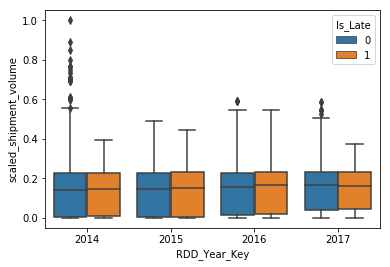

In [173]:
sns.boxplot(x="RDD_Year_Key", y="scaled_shipment_volume", data=cd_data4, hue="Is_Late")

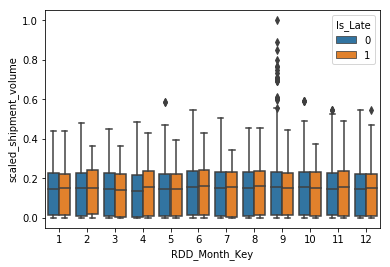

In [174]:
sns.boxplot(x="RDD_Month_Key", y="scaled_shipment_volume", data=cd_data4, hue="Is_Late")

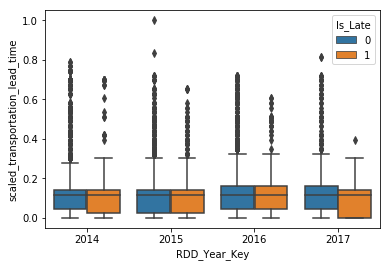

In [175]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transportation_lead_time", data=cd_data4, hue="Is_Late")

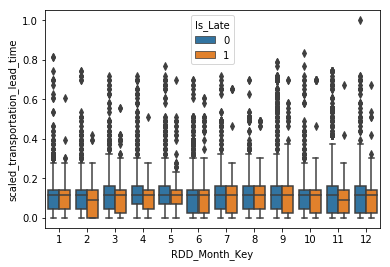

In [176]:
sns.boxplot(x="RDD_Month_Key", y="scaled_transportation_lead_time", data=cd_data4, hue="Is_Late")

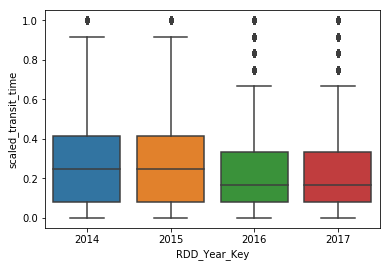

In [38]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transit_time", data=data_trans)

In [177]:
# Outliers Removal
data_wo_outliers = cd_data4[cd_data4['scaled_shipment_volume']<= 0.6]

In [178]:
data_outliers = cd_data4[cd_data4['scaled_shipment_volume']> 0.6]

In [179]:
data_outliers.shape

(18, 34)

In [180]:
data_wo_outliers.shape

(448664, 34)

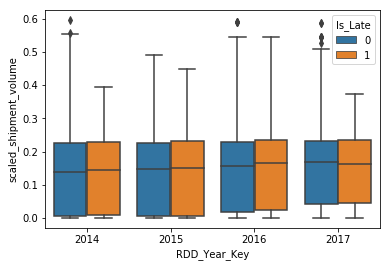

In [181]:
sns.boxplot(x="RDD_Year_Key", y="scaled_shipment_volume", data=data_wo_outliers, hue="Is_Late")

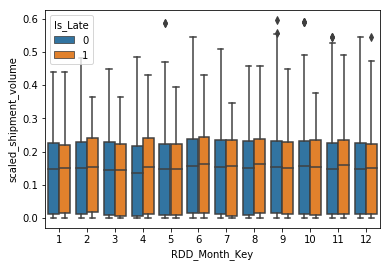

In [182]:
sns.boxplot(x="RDD_Month_Key", y="scaled_shipment_volume", data=data_wo_outliers, hue="Is_Late")

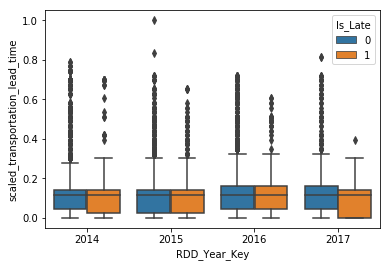

In [183]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transportation_lead_time", data=data_wo_outliers, hue="Is_Late")

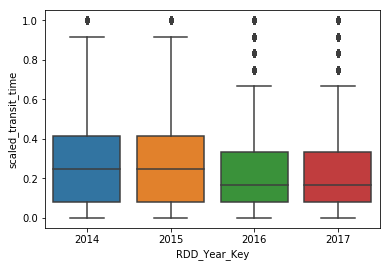

In [184]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transit_time", data=data_wo_outliers)

In [185]:
# Outliers Removal for attribute Transportation Lead Time
data_wo_outliers_2 = data_wo_outliers[data_wo_outliers['scaled_transportation_lead_time']<= 0.3]

In [186]:
data_w_outliers_2 = data_wo_outliers[data_wo_outliers['scaled_transportation_lead_time']> 0.3]

In [187]:
data_w_outliers_2.shape

(1667, 34)

In [188]:
data_wo_outliers_2.shape

(446997, 34)

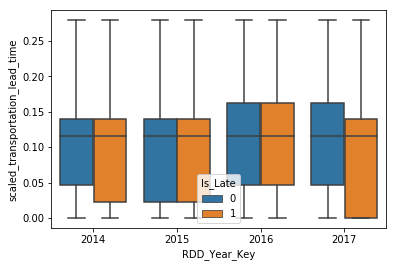

In [189]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transportation_lead_time", data=data_wo_outliers_2, hue="Is_Late")

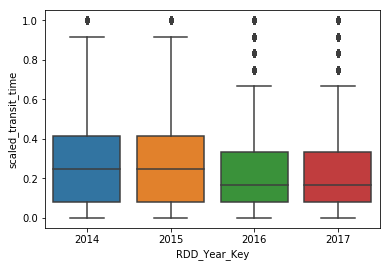

In [190]:
sns.boxplot(x="RDD_Year_Key", y="scaled_transit_time", data=data_wo_outliers_2)

In [47]:
d1 = data_wo_outliers['scaled_transportation_lead_time']

In [48]:
d1.shape

(448664,)

In [50]:
outlier_datapoints = detect_outlier(d1)
type(outlier_datapoints)

list

In [54]:
len(outlier_datapoints)

3334

In [192]:
filename = "CD_data_wo_outliers.csv"
data_wo_outliers_2.to_csv(filename,encoding="utf8",index=False)

In [3]:
data_wo_outliers = pd.read_csv('CD_data_wo_outliers.csv')
data_wo_outliers.head(10)

,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Ship_date_revised,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,cust_size,Rev_Recog_year,late_ind,Late_Period
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0.162791,0.218056,0.155546,0.750000,1,2014,0,-1 days +00:00:00.000000000
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,0,0,0.093023,0.000358,0.000168,0.750000,3,2013,0,-2 days +00:00:00.000000000
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-4 days +00:00:00.000000000
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-7 days +00:00:00.000000000
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,0,0,0.116279,0.000326,0.000337,0.833333,3,2013,0,-3 days +00:00:00.000000000


In [129]:
data_wo_outliers['cust_size'] = [3 if x == 'B' else (2 if x == 'M' else 1) for x in data_wo_outliers['cust_size']]

In [130]:
data_wo_outliers.head()

,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Ship_date_revised,Is_Late,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,Late_By_Days,cust_size,scaled_Late_By_Days
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0,0.162791,0.218056,0.155546,0.750000,1,1,0.001368
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,0,1,0,0.093023,0.000358,0.000168,0.750000,2,3,0.002736
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,1,0,0.162791,0.000326,0.000337,0.666667,4,3,0.005472
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,0,1,0,0.162791,0.000326,0.000337,0.666667,7,3,0.009576
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,0,1,0,0.116279,0.000326,0.000337,0.833333,3,3,0.004104


In [131]:
data_wo_outliers['Revenue_Recognition_Date'] = pd.to_datetime(data_wo_outliers['Revenue_Recognition_Date'])
data_wo_outliers['Rev_Recog_year'] = data_wo_outliers['Revenue_Recognition_Date'].dt.year

In [132]:
data_wo_outliers.shape

(446997, 35)

In [ ]:
# Revised logic for late_indicator

In [134]:
def calc_is_late(rev_yr,rdd_yr,rdd_mnth,rev_mnth):
    if(rev_yr == rdd_yr):
        mnth_diff = rdd_mnth - rev_mnth
        if(mnth_diff < 0):
            return 1
        else:
            return 0
    elif(rev_yr < rdd_yr):
        return 0
    else:
        return 1

In [137]:
data_wo_outliers['late_ind'] = data_wo_outliers[['Rev_Recog_year','RDD_Year_Key','RDD_Month_Key','Rev_Recog_mnth']]\
                               .apply(lambda x: calc_is_late(x['Rev_Recog_year'],
                                                             x['RDD_Year_Key'], 
                                                             x['RDD_Month_Key'],  
                                                             x['Rev_Recog_mnth']), axis=1)

In [144]:
df =data_wo_outliers[['RDD','Rev_Recog_year','RDD_Year_Key','RDD_Month_Key','Rev_Recog_mnth','late_ind']]

In [145]:
df[df['late_ind']==1]

,RDD,Rev_Recog_year,RDD_Year_Key,RDD_Month_Key,Rev_Recog_mnth,late_ind
1842,2014-01-30,2014,2014,1,2,1
1934,2014-01-30,2014,2014,1,2,1
3588,2014-02-24,2014,2014,2,3,1
3664,2014-02-25,2014,2014,2,3,1
3739,2014-02-28,2014,2014,2,3,1
3796,2014-02-28,2014,2014,2,3,1
3812,2014-02-28,2014,2014,2,3,1
3837,2014-02-27,2014,2014,2,3,1
3852,2014-02-26,2014,2014,2,3,1
3870,2014-02-27,2014,2014,2,3,1


In [142]:
data_wo_outliers.columns

Index(['Division Key', 'RDD_Year_Key', 'RDD_Month_Key', 'SID', 'Zone',
       'shipping_key', 'Shipment_Original_Destination_Appt_Date',
       'Shipment_Revised_Destination_Appt_Date',
       'Shipment_Arrive_at_Destination_Date', 'Goods_Issue _Date_SystemA',
       'Goods_Issue_Date_SystemB', 'RDD', 'Mode', 'SCAC_ID', 'Plant_Key',
       'Sold_To_Key', 'Customer_Warehouse_Key', 'Transportation_Lead_Time',
       'Shipment_Weight', 'Shipment_Volume', 'Incoterms', 'Transit_Time',
       'Revenue_Recognition_Date', 'Rev_Recog_mnth', 'Is_Ship_date_revised',
       'Is_Late', 'Is_tech_issue', 'scaled_transportation_lead_time',
       'scaled_shipment_weight', 'scaled_shipment_volume',
       'scaled_transit_time', 'Late_By_Days', 'cust_size',
       'scaled_Late_By_Days', 'Rev_Recog_year', 'late_ind'],
      dtype='object')

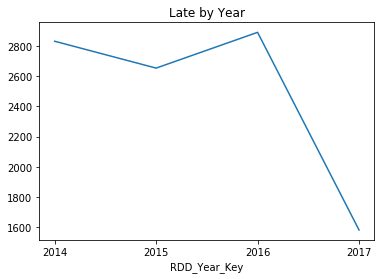

In [143]:
data_wo_outliers[data_wo_outliers['late_ind'] == 1].groupby('RDD_Year_Key').size().plot(kind='line', title='Late by Year', xticks=[2014,2015,2016,2017])

In [41]:
late_data = data_wo_outliers[data_wo_outliers['late_ind']==1]

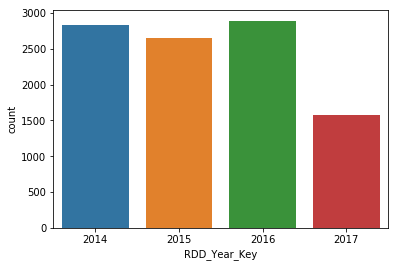

In [155]:
sns.countplot(x="RDD_Year_Key", data=late_data,)

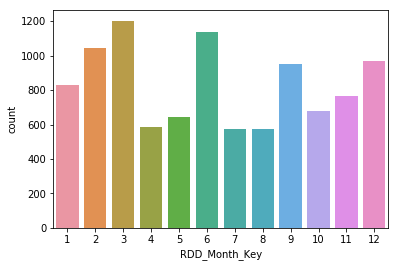

In [180]:
sns.countplot(x="RDD_Month_Key", data=late_data,)

C:\Users\Shreya\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


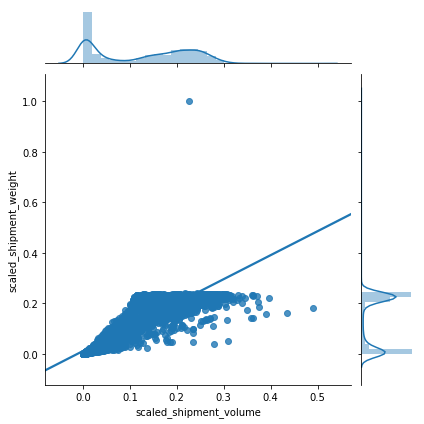

In [159]:
sns.jointplot(x='scaled_shipment_volume',y='scaled_shipment_weight',data=late_data,kind='reg')

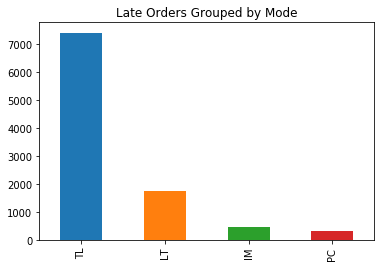

In [156]:
late_data['Mode'].value_counts().plot(kind='bar', title='Late Orders Grouped by Mode')

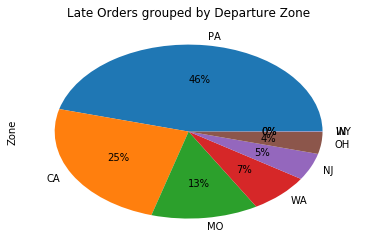

In [158]:
late_data['Zone'].value_counts().plot(kind='pie', autobpct='%1.0f%%', title='Late Orders grouped by Departure Zone')

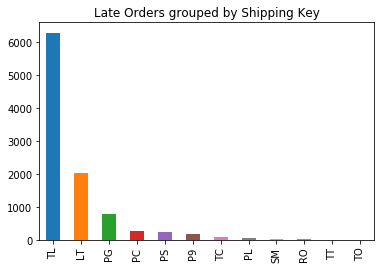

In [44]:
late_data['shipping_key'].value_counts().plot(kind='bar', title='Late Orders grouped by Shipping Key')

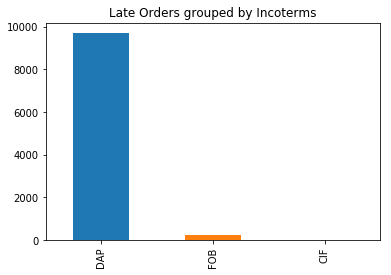

In [46]:
late_data['Incoterms'].value_counts().plot(kind='bar', title='Late Orders grouped by Incoterms')

Text(0.5,0,'Customer Warehouse Key')

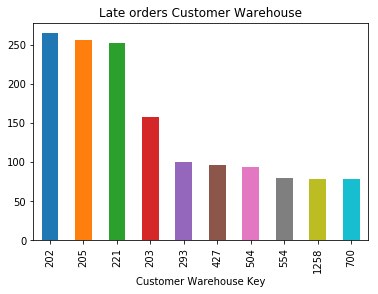

In [163]:
warehouse_plot = late_data['Customer_Warehouse_Key'].value_counts().head(10).plot(kind='bar',title='Late orders Customer Warehouse')
warehouse_plot.set_xlabel('Customer Warehouse Key')

Text(0.5,0,'Customer Id')

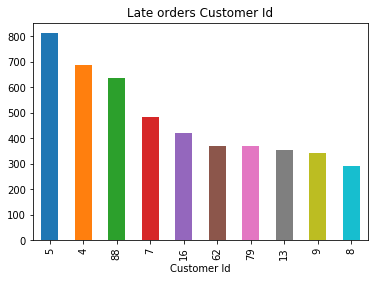

In [162]:
customer = late_data['Sold_To_Key'].value_counts().head(10).plot(kind='bar',title='Late orders Customer Id')
customer.set_xlabel('Customer Id')

Text(0.5,0,'Customer Id')

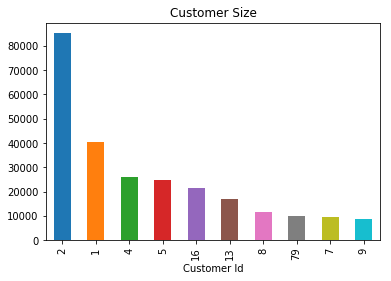

In [164]:

big_customer = data_wo_outliers['Sold_To_Key'].value_counts().head(10).plot(kind='bar',title='Customer Size')
big_customer.set_xlabel('Customer Id')

In [175]:
late_data[late_data['Sold_To_Key']== 2]['Sold_To_Key'].value_counts()

2    237
Name: Sold_To_Key, dtype: int64

In [201]:
late_data.columns

Index(['Division Key', 'RDD_Year_Key', 'RDD_Month_Key', 'SID', 'Zone',
       'shipping_key', 'Shipment_Original_Destination_Appt_Date',
       'Shipment_Revised_Destination_Appt_Date',
       'Shipment_Arrive_at_Destination_Date', 'Goods_Issue _Date_SystemA',
       'Goods_Issue_Date_SystemB', 'Mode', 'SCAC_ID', 'Plant_Key',
       'Sold_To_Key', 'Customer_Warehouse_Key', 'Transportation_Lead_Time',
       'Shipment_Weight', 'Shipment_Volume', 'Incoterms', 'Transit_Time',
       'Revenue_Recognition_Date', 'Rev_Recog_mnth', 'Is_Ship_date_revised',
       'Is_Late', 'Is_tech_issue', 'scaled_transportation_lead_time',
       'scaled_shipment_weight', 'scaled_shipment_volume',
       'scaled_transit_time', 'cust_size', 'scaled_Late_By_Days',
       'Rev_Recog_year', 'late_ind', 'Late_Period'],
      dtype='object')

In [177]:
data_wo_outliers.drop('scaled_Late_By_Days',axis=1,inplace=True)

In [147]:
data_wo_outliers['Late_Period'] = pd.to_datetime(data_wo_outliers['Shipment_Arrive_at_Destination_Date']) - pd.to_datetime(data_wo_outliers['RDD'])

In [178]:
data_wo_outliers.head(10)

,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Late,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,cust_size,Rev_Recog_year,late_ind,Late_Period
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0.162791,0.218056,0.155546,0.750000,1,2014,0,-1 days
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,1,0,0.093023,0.000358,0.000168,0.750000,3,2013,0,-2 days
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,1,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-4 days
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,1,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-7 days
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,1,0,0.116279,0.000326,0.000337,0.833333,3,2013,0,-3 days
5,11,2014,1,12360984.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,1,0,0.162791,0.000326,0.000337,0.750000,3,2013,0,-4 days
6,11,2014,1,12360985.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,1,0,0.116279,0.000326,0.000337,0.750000,3,2013,0,-4 days
7,11,2014,1,12362740.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,23-12-2013,...,1,0,0.116279,0.002008,0.004885,0.833333,1,2013,0,-6 days
8,11,2014,1,12362834.0,PA,SM,26-12-2013,26-12-2013,2013-12-26,23-12-2013,...,1,0,0.116279,0.002840,0.007327,0.750000,1,2013,0,-8 days
9,11,2014,1,12362848.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,23-12-2013,...,1,0,0.116279,0.001997,0.004880,0.833333,1,2013,0,-7 days


In [149]:
data_wo_outliers.drop('Late_By_Days',axis=1,inplace=True)

In [150]:
data_wo_outliers.shape

(446997, 36)

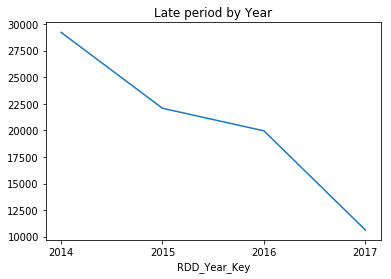

In [151]:
data_wo_outliers[data_wo_outliers['Late_Period'] > '0 days'].groupby('RDD_Year_Key').size().plot(kind='line', title='Late period by Year', xticks=[2014,2015,2016,2017])

In [ ]:
data_wo_outliers.drop('Is_Late',axis=1,inplace=True)

In [179]:
filename = "CD_data_wo_outliers.csv"
data_wo_outliers.to_csv(filename,encoding="utf8",index=False)

In [15]:
data_wo_outliers = pd.read_csv('CD_data_wo_outliers.csv')
data_wo_outliers.head(10)

,Division Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,Goods_Issue _Date_SystemA,...,Is_Ship_date_revised,Is_tech_issue,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,cust_size,Rev_Recog_year,late_ind,Late_Period
0,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,29-12-2013,...,0,0,0.162791,0.218056,0.155546,0.750000,1,2014,0,-1 days +00:00:00.000000000
1,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,20-12-2013,...,0,0,0.093023,0.000358,0.000168,0.750000,3,2013,0,-2 days +00:00:00.000000000
2,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-4 days +00:00:00.000000000
3,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.666667,3,2013,0,-7 days +00:00:00.000000000
4,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,26-12-2013,...,0,0,0.116279,0.000326,0.000337,0.833333,3,2013,0,-3 days +00:00:00.000000000
5,11,2014,1,12360984.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,0,0.162791,0.000326,0.000337,0.750000,3,2013,0,-4 days +00:00:00.000000000
6,11,2014,1,12360985.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,26-12-2013,...,0,0,0.116279,0.000326,0.000337,0.750000,3,2013,0,-4 days +00:00:00.000000000
7,11,2014,1,12362740.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,23-12-2013,...,0,0,0.116279,0.002008,0.004885,0.833333,1,2013,0,-6 days +00:00:00.000000000
8,11,2014,1,12362834.0,PA,SM,26-12-2013,26-12-2013,2013-12-26,23-12-2013,...,0,0,0.116279,0.002840,0.007327,0.750000,1,2013,0,-8 days +00:00:00.000000000
9,11,2014,1,12362848.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,23-12-2013,...,0,0,0.116279,0.001997,0.004880,0.833333,1,2013,0,-7 days +00:00:00.000000000


In [16]:
data_wo_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446997 entries, 0 to 446996
Data columns (total 34 columns):
Division Key                               446997 non-null int64
RDD_Year_Key                               446997 non-null int64
RDD_Month_Key                              446997 non-null int64
SID                                        446997 non-null float64
Zone                                       446997 non-null object
shipping_key                               446997 non-null object
Shipment_Original_Destination_Appt_Date    446997 non-null object
Shipment_Revised_Destination_Appt_Date     446997 non-null object
Shipment_Arrive_at_Destination_Date        446997 non-null object
Goods_Issue _Date_SystemA                  446997 non-null object
Goods_Issue_Date_SystemB                   446997 non-null object
RDD                                        446997 non-null object
Mode                                       446997 non-null object
SCAC_ID                          

In [49]:
data_wo_outliers["Plant_Key"] = data_wo_outliers["Plant_Key"].astype('category')
data_wo_outliers.dtypes

Division Key                                  int64
RDD_Year_Key                                  int64
RDD_Month_Key                                 int64
SID                                         float64
Zone                                         object
shipping_key                                 object
Shipment_Original_Destination_Appt_Date      object
Shipment_Revised_Destination_Appt_Date       object
Shipment_Arrive_at_Destination_Date          object
Goods_Issue _Date_SystemA                    object
Goods_Issue_Date_SystemB                     object
RDD                                          object
Mode                                         object
SCAC_ID                                       int64
Plant_Key                                  category
Sold_To_Key                                   int64
Customer_Warehouse_Key                        int64
Transportation_Lead_Time                      int64
Shipment_Weight                             float64
Shipment_Vol

In [ ]:
## Feature Selection

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('CD_data.csv')
data.head()

,Unnamed: 0,Division.Key,RDD_Year_Key,RDD_Month_Key,SID,Zone,shipping_key,Shipment_Original_Destination_Appt_Date,Shipment_Revised_Destination_Appt_Date,Shipment_Arrive_at_Destination_Date,...,ship_key_PG,ship_key_PL,ship_key_PS,ship_key_RO,ship_key_SM,ship_key_TC,ship_key_TL,ship_key_TO,incoterms_CIF,incoterms_DAP
0,1,10,2014,1,12300044.0,MO,SM,02-01-2014,02-01-2014,2014-01-02,...,0,0,0,0,1,0,0,0,0,0
1,2,10,2014,1,12340731.0,OH,SM,30-12-2013,30-12-2013,2013-12-30,...,0,0,0,0,1,0,0,0,0,0
2,3,11,2014,1,12360910.0,PA,SM,30-12-2013,30-12-2013,2013-12-30,...,0,0,0,0,1,0,0,0,0,0
3,4,11,2014,1,12360913.0,PA,SM,27-12-2013,27-12-2013,2013-12-27,...,0,0,0,0,1,0,0,0,0,0
4,5,11,2014,1,12360916.0,PA,SM,31-12-2013,31-12-2013,2013-12-31,...,0,0,0,0,1,0,0,0,0,0


In [4]:
data.columns

Index(['Unnamed: 0', 'Division.Key', 'RDD_Year_Key', 'RDD_Month_Key', 'SID',
       'Zone', 'shipping_key', 'Shipment_Original_Destination_Appt_Date',
       'Shipment_Revised_Destination_Appt_Date',
       'Shipment_Arrive_at_Destination_Date', 'Goods_Issue._Date_SystemA',
       'Goods_Issue_Date_SystemB', 'RDD', 'Mode', 'SCAC_ID', 'Plant_Key',
       'Sold_To_Key', 'Customer_Warehouse_Key', 'Transportation_Lead_Time',
       'Shipment_Weight', 'Shipment_Volume', 'Incoterms', 'Transit_Time',
       'Revenue_Recognition_Date', 'Rev_Recog_mnth', 'Is_Ship_date_revised',
       'Is_tech_issue', 'scaled_transportation_lead_time',
       'scaled_shipment_weight', 'scaled_shipment_volume',
       'scaled_transit_time', 'cust_size', 'Rev_Recog_year', 'late_ind',
       'Late_Period', 'zone_CA', 'zone_IN', 'zone_MO', 'zone_NJ', 'zone_OH',
       'zone_PA', 'zone_VA', 'zone_WA', 'mode_IM', 'mode_LT', 'mode_PC',
       'ship_key_LT', 'ship_key_P9', 'ship_key_PC', 'ship_key_PG',
       'ship_key

In [11]:
data.shape

(446997, 59)

In [16]:
data['Plant_Key'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

In [17]:
cd_data = data[['scaled_transportation_lead_time','scaled_shipment_weight','scaled_shipment_volume','scaled_transit_time','zone_CA',
'zone_IN','zone_MO','zone_NJ','zone_OH','zone_PA','zone_VA','zone_WA','mode_IM','mode_LT','mode_PC','ship_key_LT','ship_key_P9','ship_key_PC','ship_key_PG','ship_key_PL','ship_key_PS','ship_key_RO',                               
'ship_key_SM','ship_key_TC','ship_key_TL','ship_key_TO','incoterms_CIF','incoterms_DAP','Is_tech_issue','Is_Ship_date_revised','cust_size','late_ind']]

In [18]:
cd_data.head()

,scaled_transportation_lead_time,scaled_shipment_weight,scaled_shipment_volume,scaled_transit_time,zone_CA,zone_IN,zone_MO,zone_NJ,zone_OH,zone_PA,...,ship_key_SM,ship_key_TC,ship_key_TL,ship_key_TO,incoterms_CIF,incoterms_DAP,Is_tech_issue,Is_Ship_date_revised,cust_size,late_ind
0,0.162791,0.218056,0.155546,0.750000,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0.093023,0.000358,0.000168,0.750000,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,3,0
2,0.162791,0.000326,0.000337,0.666667,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,0
3,0.162791,0.000326,0.000337,0.666667,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,0
4,0.116279,0.000326,0.000337,0.833333,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,3,0


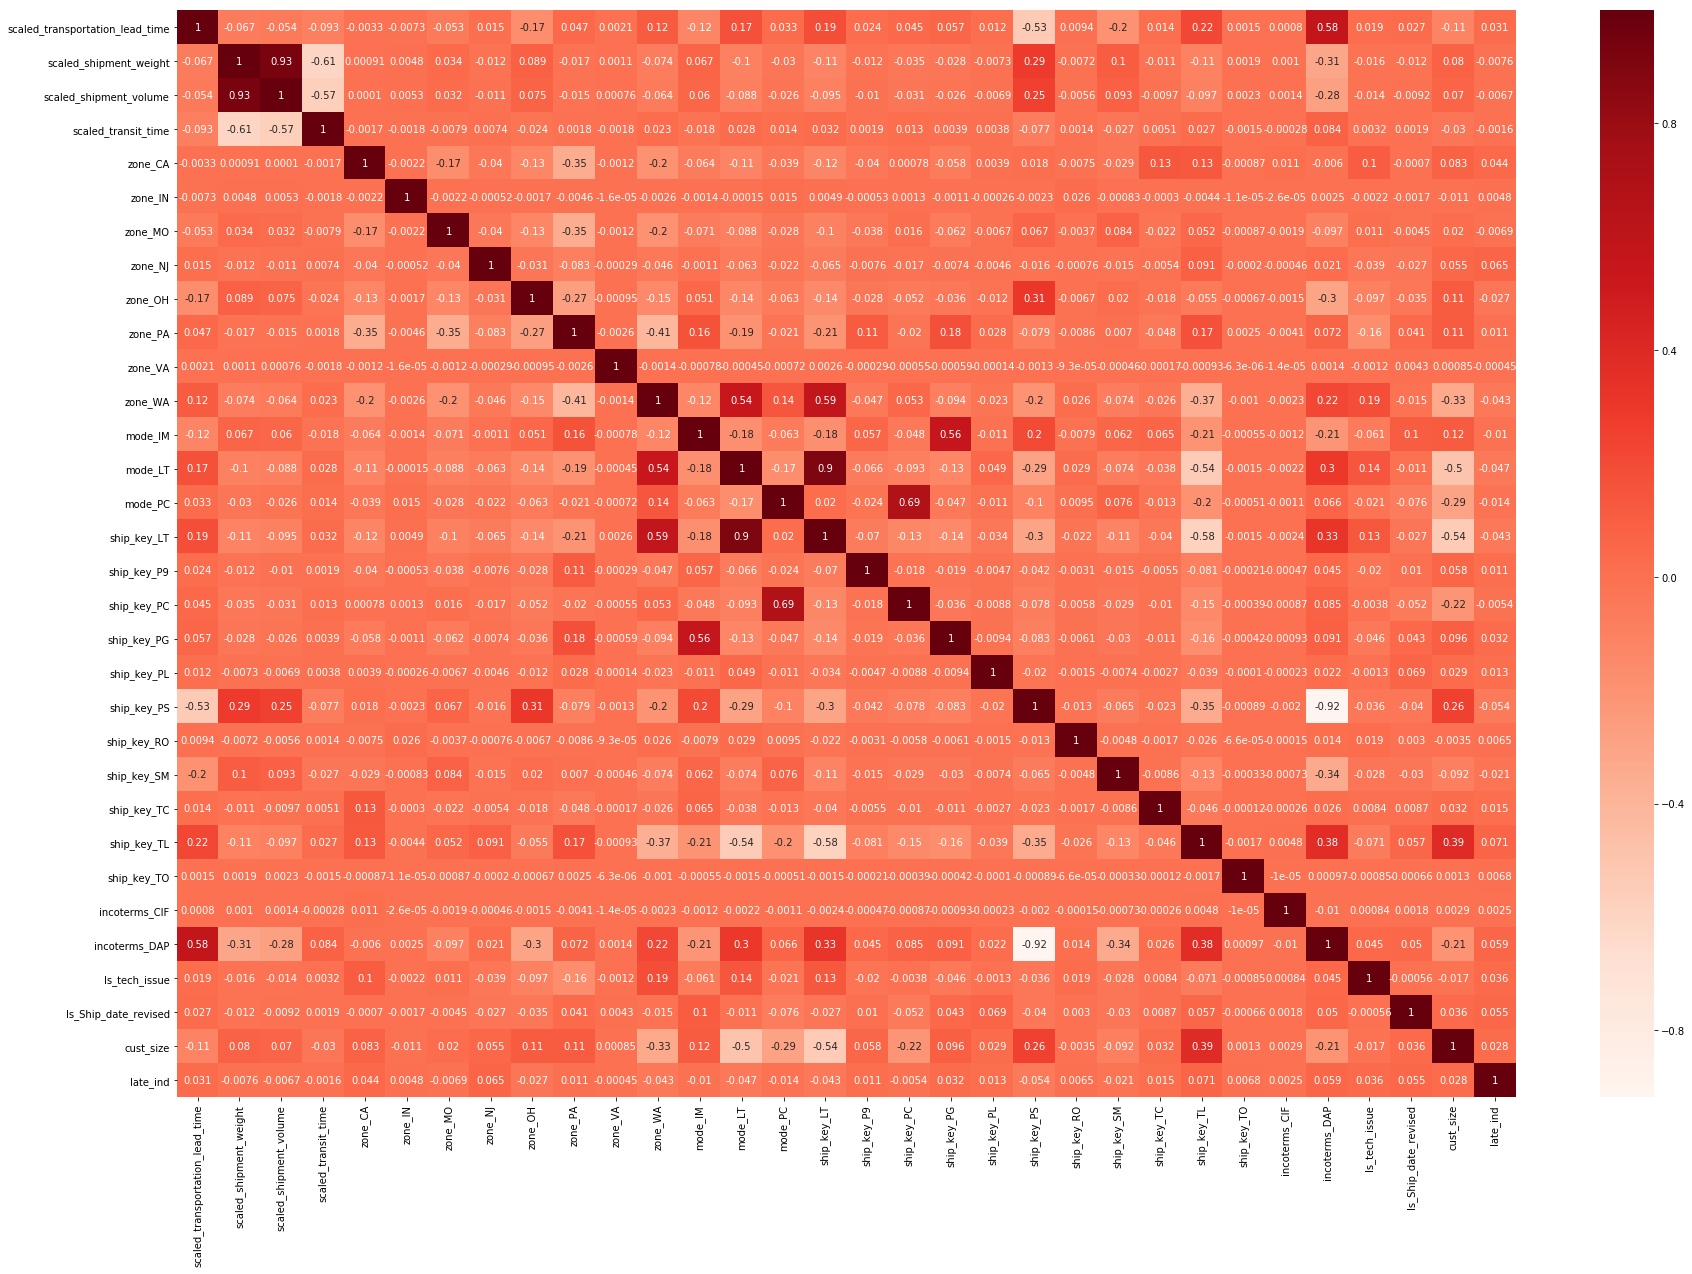

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(30,20))
cor = cd_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
##Feature selection using RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [50]:
X = cd_data.drop('late_ind',axis=1)
y = cd_data['late_ind']

NameError: name 'cd_data' is not defined

In [22]:
, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [48]:
X_train.columns

NameError: name 'X_train' is not defined

In [24]:
feat_labels = ['scaled_transportation_lead_time','scaled_shipment_weight','scaled_shipment_volume','scaled_transit_time','zone_CA',
'zone_IN','zone_MO','zone_NJ','zone_OH','zone_PA','zone_VA','zone_WA','mode_IM','mode_LT','mode_PC','ship_key_LT','ship_key_P9','ship_key_PC','ship_key_PG','ship_key_PL','ship_key_PS','ship_key_RO',                               
'ship_key_SM','ship_key_TC','ship_key_TL','ship_key_TO','incoterms_CIF','incoterms_DAP','Is_tech_issue','Is_Ship_date_revised','cust_size']

In [25]:
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf.fit(X_train, y_train)

clf.

# Print the name and gini importance of each feature
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('scaled_transportation_lead_time', 0.06952957047573072)
('scaled_shipment_weight', 0.4093468497055348)
('scaled_shipment_volume', 0.4012520256848481)
('scaled_transit_time', 0.060316888589827276)
('zone_CA', 0.0032400155515064427)
('zone_IN', 0.00010020539879034633)
('zone_MO', 0.0022870617523565832)
('zone_NJ', 0.00439618781325194)
('zone_OH', 0.0012325671763031493)
('zone_PA', 0.0027922117369671164)
('zone_VA', 3.2309459149743185e-06)
('zone_WA', 0.0017442735159425198)
('mode_IM', 0.0029296106359441355)
('mode_LT', 0.003888044054701594)
('mode_PC', 0.0013999175148360814)
('ship_key_LT', 0.0021166599112635276)
('ship_key_P9', 0.000633231943822404)
('ship_key_PC', 0.0007963514640630838)
('ship_key_PG', 0.0013906612150124816)
('ship_key_PL', 0.0004738123484767965)
('ship_key_PS', 0.0013435086157139833)
('ship_key_RO', 0.00043076238072558415)
('ship_key_SM', 0.00019793053609320886)
('ship_key_TC', 0.00038330878063964934)
('ship_key_TL', 0.002719911238504158)
('ship_key_TO', 2.1561892914

In [26]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05
sfm = SelectFromModel(clf, threshold=0.01)

# Train the selector
sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.01)

In [27]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

scaled_transportation_lead_time
scaled_shipment_weight
scaled_shipment_volume
scaled_transit_time
cust_size


In [28]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

In [29]:
# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
# Apply The Full Featured Classifier To The Test Data
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y_test, y_pred)

0.9761372110365399

In [31]:
# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (2 Features) Model
accuracy_score(y_test, y_important_pred)

0.9764280387770321

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), feat_labels), 
             reverse=True))

Features sorted by their score:
[(0.4036, 'scaled_shipment_weight'), (0.387, 'scaled_shipment_volume'), (0.0707, 'scaled_transportation_lead_time'), (0.061, 'scaled_transit_time'), (0.0119, 'cust_size'), (0.0088, 'zone_PA'), (0.0075, 'Is_tech_issue'), (0.0071, 'Is_Ship_date_revised'), (0.0067, 'zone_MO'), (0.0058, 'zone_CA'), (0.0049, 'ship_key_TL'), (0.0044, 'zone_OH'), (0.0041, 'zone_NJ'), (0.003, 'mode_LT'), (0.002, 'ship_key_PG'), (0.002, 'mode_IM'), (0.0019, 'zone_WA'), (0.0019, 'mode_PC'), (0.0015, 'incoterms_DAP'), (0.0013, 'ship_key_LT'), (0.0009, 'ship_key_PC'), (0.0005, 'ship_key_PL'), (0.0004, 'ship_key_RO'), (0.0003, 'ship_key_TC'), (0.0003, 'ship_key_P9'), (0.0002, 'zone_IN'), (0.0001, 'ship_key_PS'), (0.0001, 'incoterms_CIF'), (0.0, 'zone_VA'), (0.0, 'ship_key_TO'), (0.0, 'ship_key_SM')]


In [34]:
cd_data.shape

(446997, 32)

In [36]:
cd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446997 entries, 0 to 446996
Data columns (total 32 columns):
scaled_transportation_lead_time    446997 non-null float64
scaled_shipment_weight             446997 non-null float64
scaled_shipment_volume             446997 non-null float64
scaled_transit_time                446997 non-null float64
zone_CA                            446997 non-null int64
zone_IN                            446997 non-null int64
zone_MO                            446997 non-null int64
zone_NJ                            446997 non-null int64
zone_OH                            446997 non-null int64
zone_PA                            446997 non-null int64
zone_VA                            446997 non-null int64
zone_WA                            446997 non-null int64
mode_IM                            446997 non-null int64
mode_LT                            446997 non-null int64
mode_PC                            446997 non-null int64
ship_key_LT               

In [ ]:
#Selecting features using chi-square test

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
chi_data = data_wo_outliers[['zone_CA',
'zone_IN','zone_MO','zone_NJ','zone_OH','zone_PA','zone_VA','zone_WA','mode_IM','mode_LT','mode_PC','ship_key_LT','ship_key_P9','ship_key_PC','ship_key_PG','ship_key_PL','ship_key_PS','ship_key_RO',                               
'ship_key_SM','ship_key_TC','ship_key_TL','ship_key_TO','incoterms_CIF','incoterms_DAP','Is_tech_issue','Is_Ship_date_revised','cust_size','late_ind']]

In [22]:
chi_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446997 entries, 0 to 446996
Data columns (total 28 columns):
zone_CA                 446997 non-null int64
zone_IN                 446997 non-null int64
zone_MO                 446997 non-null int64
zone_NJ                 446997 non-null int64
zone_OH                 446997 non-null int64
zone_PA                 446997 non-null int64
zone_VA                 446997 non-null int64
zone_WA                 446997 non-null int64
mode_IM                 446997 non-null int64
mode_LT                 446997 non-null int64
mode_PC                 446997 non-null int64
ship_key_LT             446997 non-null int64
ship_key_P9             446997 non-null int64
ship_key_PC             446997 non-null int64
ship_key_PG             446997 non-null int64
ship_key_PL             446997 non-null int64
ship_key_PS             446997 non-null int64
ship_key_RO             446997 non-null int64
ship_key_SM             446997 non-null int64
ship_key_TC    

In [24]:
X_chi = chi_data.drop('late_ind',axis=1)
y_chi = chi_data['late_ind']

In [27]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_chi, y_chi)
# summarize scores
#np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_chi)
# summarize selected features
print(features[0:5,:])

[7.349e+02 1.033e+01 1.809e+01 1.854e+03 2.912e+02 2.987e+01 9.114e-02
 6.800e+02 4.459e+01 6.608e+02 8.645e+01 5.418e+02 5.708e+01 1.265e+01
 4.539e+02 8.045e+01 1.104e+03 1.870e+01 1.926e+02 9.510e+01 1.343e+03
 2.096e+01 2.773e+00 2.741e+02 4.925e+02 1.230e+03 8.272e+01]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


In [ ]:
## Selecting features using p-value

In [37]:
#selected_columns = selected_columns[1:].values
import statsmodels.formula.api as sm
def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(Y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
                    
    regressor_OLS.summary()
    return x, columns
SL = 0.10
data_modeled, selected_columns = backwardElimination(cd_data.iloc[:,:cd_data.shape[1]-2].values, cd_data.iloc[:,cd_data.shape[1]-1].values, SL, feat_labels)

In [38]:
selected_columns

array(['scaled_transportation_lead_time', 'scaled_shipment_weight',
       'zone_CA', 'zone_IN', 'zone_MO', 'zone_NJ', 'zone_OH', 'zone_PA',
       'mode_IM', 'mode_LT', 'mode_PC', 'ship_key_LT', 'ship_key_P9',
       'ship_key_PC', 'ship_key_PG', 'ship_key_PS', 'ship_key_TC',
       'ship_key_TL', 'ship_key_TO', 'incoterms_CIF', 'incoterms_DAP',
       'Is_tech_issue', 'Is_Ship_date_revised', 'cust_size'], dtype='<U31')

In [ ]:
#Applying RandomForestClassifier after feature selection

In [ ]:
labels = ['scaled_transportation_lead_time', 'scaled_shipment_weight', 'Is_tech_issue' , 'Is_Ship_date_revised' , 'mode_IM' , 'mode_PC' , 'mode_LT' ,
'zone_CA' , 'zone_NJ' , 'zone_WA' , 'zone_IN' , 'zone_PA' , 'ship_key_TL' , 'ship_key_PG' , 'ship_key_P9' , 'ship_key_PS' , 'ship_key_PL' , 'ship_key_RO' , 
'ship_key_TO' , 'ship_key_SM' , 'incoterms_DAP']

In [52]:
cd_data_2 = data[['late_ind','scaled_transportation_lead_time', 'scaled_shipment_weight', 'Is_tech_issue' , 'Is_Ship_date_revised' , 'mode_IM' , 'mode_PC' , 'mode_LT' ,
'zone_CA' , 'zone_NJ' , 'zone_WA' , 'zone_IN' , 'zone_PA' , 'ship_key_TL' , 'ship_key_PG' , 'ship_key_P9' , 'ship_key_PS' , 'ship_key_PL' , 'ship_key_RO' , 
'ship_key_TO' , 'ship_key_SM' , 'incoterms_DAP']]

In [53]:
cd_data_2.head()

,late_ind,scaled_transportation_lead_time,scaled_shipment_weight,Is_tech_issue,Is_Ship_date_revised,mode_IM,mode_PC,mode_LT,zone_CA,zone_NJ,...,zone_PA,ship_key_TL,ship_key_PG,ship_key_P9,ship_key_PS,ship_key_PL,ship_key_RO,ship_key_TO,ship_key_SM,incoterms_DAP
0,0,0.162791,0.218056,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.093023,0.000358,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.162791,0.000326,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.162791,0.000326,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0.116279,0.000326,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [54]:
X2 = cd_data_2.drop('late_ind',axis=1)
y2 = cd_data_2['late_ind']

In [55]:
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.30, random_state=42)

In [56]:
# Create a random forest classifier
clf2 = RandomForestClassifier(n_estimators=100)

# Train the classifier
clf2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [57]:
# Apply The Full Featured Classifier To The Test Data
y2_pred = clf2.predict(X2_test)

# View The Accuracy Of Our Full Feature (4 Features) Model
accuracy_score(y2_test, y2_pred)

0.9616032811334825